### Set up environment

In [1]:
import lateral_signaling as lsig
import numpy as np
import pandas as pd
from tqdm import tqdm
import numba

import scipy.stats as st
from scipy.spatial import Voronoi
from scipy.sparse import csr_matrix

import holoviews as hv
import colorcet as cc
hv.extension("matplotlib")

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W

In [2]:
import os

In [3]:
%load_ext blackcellmagic

__Define RHS function(s)__

In [4]:
def tc_rhs_beta_g_normA(S, S_delay, Adj, sender_idx, beta_func, beta_args, alpha, k, p, delta, lambda_, g, rho):
    """
    Right-hand side of the transciever circuit delay 
    differential equation. Uses a matrix of cell-cell contact 
    lengths `L`.
    """

    # Get signaling as a function of density
    beta = beta_func(rho, *beta_args)
    
    # Get input signal across each interface
    S_bar = beta * (Adj @ S_delay)

    # Calculate dE/dt
    dS_dt = (
        lambda_
        + alpha
        * (S_bar ** p)
        / (
            ((g ** 2) * k) ** p 
            + (delta * S_delay) ** p 
            + S_bar ** p
        )
        - g * S
    )

    # Set sender cell to zero
    dS_dt[sender_idx] = 0

    return dS_dt

In [5]:
def tc_rhs_beta_g_normA_inhib(S, S_delay, Adj, sender_idx, beta_func, beta_args, I, alpha, k, p, delta, lambda_, g, rho):
    """
    Right-hand side of the transciever circuit delay 
    differential equation. Uses a matrix of cell-cell contact 
    lengths `L`.
    """

    # Get signaling as a function of density
    beta = beta_func(rho, *beta_args)
    
    # Get input signal across each interface
    S_bar = beta * (Adj @ S_delay)

    # Calculate dE/dt
    dS_dt = (
        lambda_
        + alpha
        * (S_bar ** p)
        / (
            ((g ** 2) * k) ** p 
            + (delta * (S_delay + I)) ** p 
            + S_bar ** p
        )
        - g * S
    )

    # Set sender cell to zero
    dS_dt[sender_idx] = 0

    return dS_dt

In [6]:
from scipy.sparse import csr_matrix, diags, identity
import scipy.stats

def k_step_Adj(k, rows, cols=0, dtype=np.float32, row_stoch=False, **kwargs):
    """
    """
    
    if not cols:
        cols = rows
        
    # Construct adjacency matrix
    a = lsig.make_Adj_sparse(rows, cols, dtype=dtype, **kwargs)
    
    # Add self-edges
    n = rows * cols
    eye = identity(n).astype(dtype)
    A = (a + eye)
    
    # Compute number of paths of length k between nodes
    A = A ** k
    
    # Store as 0. or 1.
    A = (A > 0).astype(dtype)
    
    # Remove self-edges
    A = A - diags(A.diagonal())
    
    if row_stoch:
        rowsum = np.sum(A, axis=1)
        A = csr_matrix(A / rowsum)
    
    return A

<hr>

## Metrics for activation behavior

In [7]:
@numba.njit
def is_monotonic(arr):
    return not np.any(np.diff(arr) < 0)

In [8]:
@numba.njit
def is_biphasic(arr, pct_thresh):
    return (np.diff(arr > pct_thresh) != 0).sum() > 1

In [9]:
@numba.njit
def is_propagated(arr, pct_thresh):
    return np.any(arr > pct_thresh)

## Read in data from HPC runs

In [10]:
from glob import glob
import os

In [11]:
glob("HPC_data/20210407_sweep_TCphase_dense/*")
# os.path.exists()

['HPC_data/20210407_sweep_TCphase_dense\\20210407_sweep_TCphase_dense_results.npz']

In [12]:
zipdata = os.path.join(
    "HPC_data",
    "20210407_sweep_TCphase_dense",
    "20210407_sweep_TCphase_dense_results.npz"
)

In [13]:
npz = np.load(zipdata)

In [14]:
list(npz.keys())

['n',
 't',
 'random_seeds',
 'sender_idx_rep',
 'param_names',
 'param_space',
 'S_actnum_param',
 'S_tcmean_param']

In [15]:
n = npz["n"]
t = npz["t"]
random_seeds = npz["random_seeds"]
sender_idx_rep = npz["sender_idx_rep"]
param_names = npz["param_names"]
param_space = npz["param_space"]
# S_actnum_param_constant = npz["S_actnum_param_constant"]
# S_tcmean_param_constant = npz["S_tcmean_param_constant"]
S_actnum_param = npz["S_actnum_param"]
S_tcmean_param = npz["S_tcmean_param"]

In [16]:
param_names

array(['rep', 'g', 'rho_0', 'rho_max'], dtype='<U7')

In [17]:
rep_space     = np.sort(np.unique(param_space[:, 0].astype(int)))
g_space       = np.sort(np.unique(param_space[:, 1]))
rho_0_space   = np.sort(np.unique(param_space[:, 2]))
rho_max_space = np.sort(np.unique(param_space[:, 3]))

n_runs = param_space.shape[0]

In [30]:
# Get params corresponding to each replicate batch,
#   preserving order 
param_space_agg = param_space[S_prop_rep_idx[:, 0], 1:]

In [18]:
# Percent of cells activated
S_prop_param = S_actnum_param / n

# % cells activated, mean over `nreps` replicates
S_prop_df = pd.DataFrame(param_space, columns=param_names)
S_prop_df = S_prop_df.reset_index()
S_prop_df.rep = S_prop_df.rep.astype(int)

In [19]:
S_prop_rep_grp = S_prop_df.groupby(list(param_names[1:]))["index"]
S_prop_rep_grp = list(S_prop_rep_grp)
S_prop_rep_idx = np.empty((n_runs // rep_space.size, rep_space.size), dtype=int)

for i in range(n_runs // rep_space.size):
    S_prop_rep_idx[i] = S_prop_rep_grp[i][1].values

In [20]:
S_actnum_mean = S_actnum_param[S_prop_rep_idx, :].mean(axis=1)
S_tcmean_mean = S_tcmean_param[S_prop_rep_idx, :].mean(axis=1)

<hr>

In [24]:
import bebi103
import bokeh_catplot
import bokeh.io
bokeh.io.output_notebook()

Loading BokehJS ...

In [26]:
p = bokeh_catplot.ecdf(S_tcmean_mean[:, -1])

bokeh.io.show(p)

In [97]:
phase_behavior2 = (S_tcmean_mean[:, -1] > 0.02).astype(int)

In [284]:
mask = param_space_agg[:, 1] == param_space_agg[:, 2]

constant_dens_plot2 = hv.Points(
    (param_space_agg[mask, 0], param_space_agg[mask, 2])
).opts(
    title = r"Constant $\rho$",
    xlim = (0.1, 10),
    ylim = (  1,  8),
    xlabel = r"$g$",
#     xticks = 3,
    ylabel = r"$\rho$",
    yticks = (1, 2, 4, 6, 8),
    marker = "s",
    s=100,
    c=np.array(cc.glasbey_cool)[phase_behavior2[mask]], 
    cmap="plasma",
    logx=True, 
    aspect=2.5,
    fontscale=1.5,
)

:Points   [x,y]
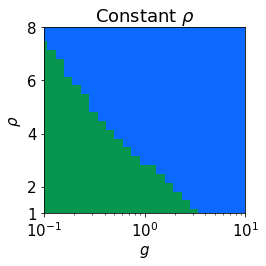

In [285]:
constant_dens_plot2

In [317]:
dt = t[1] - t[0]
S_tcmean_initslope = (S_tcmean_param[:, 1] - S_tcmean_param[:, 0]) / dt
S_tcmean_initslope_agg = S_tcmean_initslope[S_prop_rep_idx].mean(axis=1)


(14400,)

In [318]:
p = bokeh_catplot.ecdf(S_tcmean_initslope_agg)

bokeh.io.show(p)

In [309]:
np.searchsorted(t, param_space[:, 1] * 0.5)

array([  5,   7,   8, ..., 341, 413, 500], dtype=int64)

In [302]:
0.5 * param_space[]
phase_behavior3 = (S_tcmean_mean[:, -1] > 0.02).astype(int) + np.any(S_tcmean_mean > 0.02, axis=1).astype(int)
phase_behavior3 = ( - phase_behavior3) % 3

In [303]:
mask = param_space_agg[:, 1] == param_space_agg[:, 2]

constant_dens_plot3 = hv.Points(
    (param_space_agg[mask, 0], param_space_agg[mask, 2])
).opts(
    title = r"Constant $\rho$",
    xlim = (0.1, 10),
    ylim = (  1,  8),
    xlabel = r"$g$",
#     xticks = 3,
    ylabel = r"$\rho$",
    yticks = (1, 2, 4, 6, 8),
    marker = "s",
    s=100,
    c=np.array(cc.glasbey_cool)[phase_behavior3[mask]], 
    cmap="plasma",
    logx=True, 
    aspect=2.5,
    fontscale=1.5,
)

:Points   [x,y]
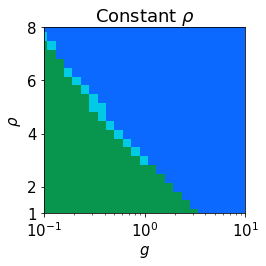

In [304]:
constant_dens_plot3

In [282]:
t[1] - t[0]

0.01

In [71]:
(np.diff(S_tcmean_param, axis=1)[:, -1] / 0.01).max()

1.1034727

<hr>

In [35]:
# Threshold for phase behavior
phase_thresh = 0.2   #  % activated cells

# n_runs = S_prop_param.shape[0]

# Calculate phase behavior
iterator = range(n_runs)
# iterator = tqdm(iterator)
S_prop_bool = np.zeros((n_runs,), dtype=bool)
S_biph_bool = np.zeros((n_runs,), dtype=bool)

for i in iterator:
    S_prop_bool[i] = is_propagated(S_prop_param[i], phase_thresh)
    S_biph_bool[i] = is_biphasic(S_prop_param[i], phase_thresh)
#     monotonicity = np.array([is_monotonic(s) for s in S_prop_param])

In [36]:
# Average phase behavior over replicates
S_prop_pct = S_prop_bool[S_prop_rep_idx].mean(axis=1)
S_biph_pct = S_biph_bool[S_prop_rep_idx].mean(axis=1)

# If any replicates show behavior, set True
S_prop_bool_agg = np.any(S_prop_bool[S_prop_rep_idx], axis=1)
S_biph_bool_agg = np.any(S_biph_bool[S_prop_rep_idx], axis=1)

# Convert to phase
#   0 = no propagation, 1 = propagation, 2 = biphasic
phase_behavior = (1 + S_biph_bool_agg) * S_prop_bool_agg

In [37]:
S_prop_pct[(S_prop_pct * (1 - S_prop_pct) > 1e-8).nonzero()[0]]

array([0.2, 0.4, 0.8, 0.2, 0.8, 0.2, 0.8, 0.6, 0.4, 0.4, 0.2, 0.8, 0.8,
       0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.6, 0.6, 0.6, 0.6, 0.6,
       0.6])

In [38]:
g_space       = np.sort(np.unique(param_space_agg[:, 0]))
rho_0_space   = np.sort(np.unique(param_space_agg[:, 1]))
rho_max_space = np.sort(np.unique(param_space_agg[:, 2]))

<hr>

:Points   [x,y]
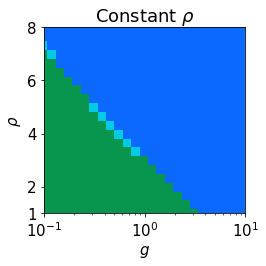

In [101]:
mask = param_space_agg[:, 1] == param_space_agg[:, 2]

constant_dens_plot = hv.Points(
    (param_space_agg[mask, 0], param_space_agg[mask, 2])
).opts(
    title = r"Constant $\rho$",
    xlim = (0.1, 10),
    ylim = (  1,  8),
    xlabel = r"$g$",
#     xticks = 3,
    ylabel = r"$\rho$",
    yticks = (1, 2, 4, 6, 8),
    marker = "s",
    s=100,
    c=np.array(cc.glasbey_cool)[phase_behavior[mask]], 
    cmap="plasma",
    logx=True, 
    aspect=2.5,
    fontscale=1.5,
)

constant_dens_plot

Now I'll use a linear approximation of this boundary and sample around the boundary to increase our resolution.

In [102]:
def crit_rho_approx(g, a=3.1, b=4.1):
    return a - b * np.log10(g)

def crit_g_approx(rho, a=3.1, b=4.1):
    return 10 ** ((a - rho)/b)

In [103]:
g_plot_ = np.logspace(-1, 0.5, 100)

approx_bound = crit_rho_approx(g_plot_)

:Layout
   .Points.I   :Points   [x,y]
   .Overlay.I  :Overlay
      .Points.I :Points   [x,y]
      .Curve.I  :Curve   [x]   (y)
   .Overlay.II :Overlay
      .Points.I :Points   [x,y]
      .Curve.I  :Curve   [x]   (y)
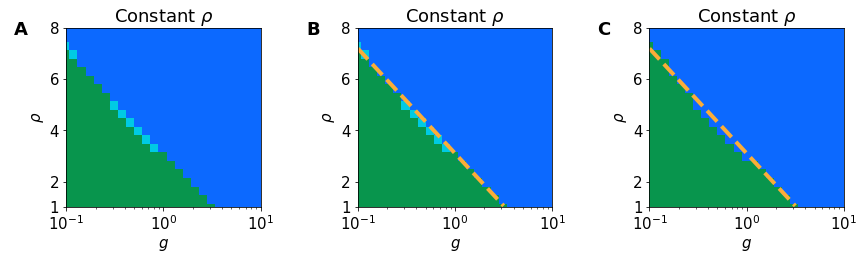

In [104]:
fit_curve = hv.Curve(
    (g_plot_, approx_bound)
).opts(
    c=cc.CET_L8[200],
    linewidth=4,
    linestyle="dashed",
)

constant_dens_plot + (constant_dens_plot * fit_curve) + (constant_dens_plot2 * fit_curve)

<hr>

In [254]:
def crit_g_curve(rho_0, rho_range):
    
    return hv.Curve(
        (np.array([crit_g_approx(rho_0)] * rho_range.size), rho_range, )
    ).opts(
        c=cc.CET_L8[100],
        linewidth=4,
        linestyle="dashed",
    )

In [259]:
rho_range = np.linspace(1, 8, 100)

nplots = rho_0_space.size
phase_fit_plots = []
for i in range(nplots):
    mask = param_space_agg[:, 1] == rho_0_space[i]
    plot = hv.Points(
        (param_space_agg[mask, 0], param_space_agg[mask, 2])
    ).opts(
        title = r"$\rho_0$ = " + f"{rho_0_space[i]:.2f}",
        xlim = (0.1, 10),
        ylim = (  1,  8),
        xlabel = r"$g$",
        ylabel = r"$\rho_{max}$",
        yticks = (1, 2, 4, 6, 8),
        marker = "s",
        s=100,
        c=np.array(cc.glasbey_cool)[phase_behavior[mask]], 
        cmap="plasma",
        logx=True, 
        aspect=2.5,
        fontscale=1.5,
    )    
    
    phase_fit_plots.append(plot * crit_g_curve(rho_0_space[i], rho_range) * fit_curve)


:Layout
   .Overlay.I   :Overlay
      .Points.I :Points   [x,y]
      .Curve.I  :Curve   [x]   (y)
      .Curve.II :Curve   [x]   (y)
   .Overlay.II  :Overlay
      .Points.I :Points   [x,y]
      .Curve.I  :Curve   [x]   (y)
      .Curve.II :Curve   [x]   (y)
   .Overlay.III :Overlay
      .Points.I :Points   [x,y]
      .Curve.I  :Curve   [x]   (y)
      .Curve.II :Curve   [x]   (y)
   .Overlay.IV  :Overlay
      .Points.I :Points   [x,y]
      .Curve.I  :Curve   [x]   (y)
      .Curve.II :Curve   [x]   (y)
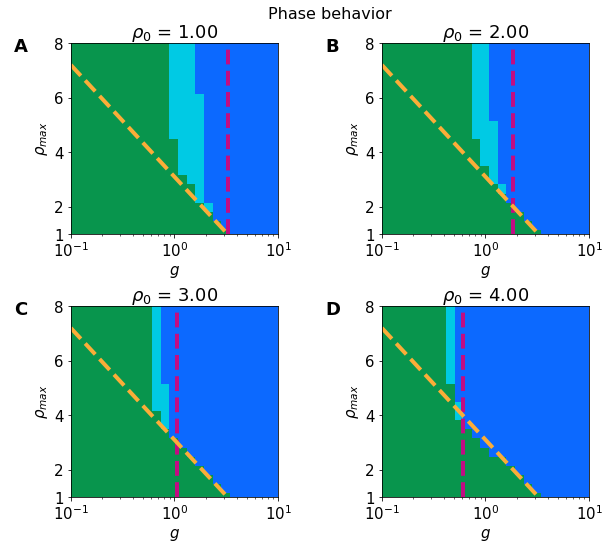

In [260]:
hv.Layout(phase_fit_plots[2:13:3]).cols(2).opts(title=f"Phase behavior")

In [261]:
nplots = rho_0_space.size
prop_plots = []
for i in range(nplots):
    mask = param_space_agg[:, 1] == rho_0_space[i]
    plot = hv.Points(
        (param_space_agg[mask, 0], param_space_agg[mask, 2])
    ).opts(
        title = r"$\rho_0$ = " + f"{rho_0_space[i]:.2f}",
        xlim = (0.1, 10),
        ylim = (  1,  8),
        xlabel = r"$g$",
        ylabel = r"$\rho_{max}$",
        yticks = (1, 2, 4, 6, 8),
        marker = "s",
        s=70,
        c=S_prop_pct[mask], 
        cmap="cet_isoluminant_cgo_80_c38",
        logx=True, 
        aspect=2.5,
        fontscale=1.5,
    )
    
    prop_plots.append(plot)
    

:Layout
   .Points.I    :Points   [x,y]
   .Points.II   :Points   [x,y]
   .Points.III  :Points   [x,y]
   .Points.IV   :Points   [x,y]
   .Points.V    :Points   [x,y]
   .Points.VI   :Points   [x,y]
   .Points.VII  :Points   [x,y]
   .Points.VIII :Points   [x,y]
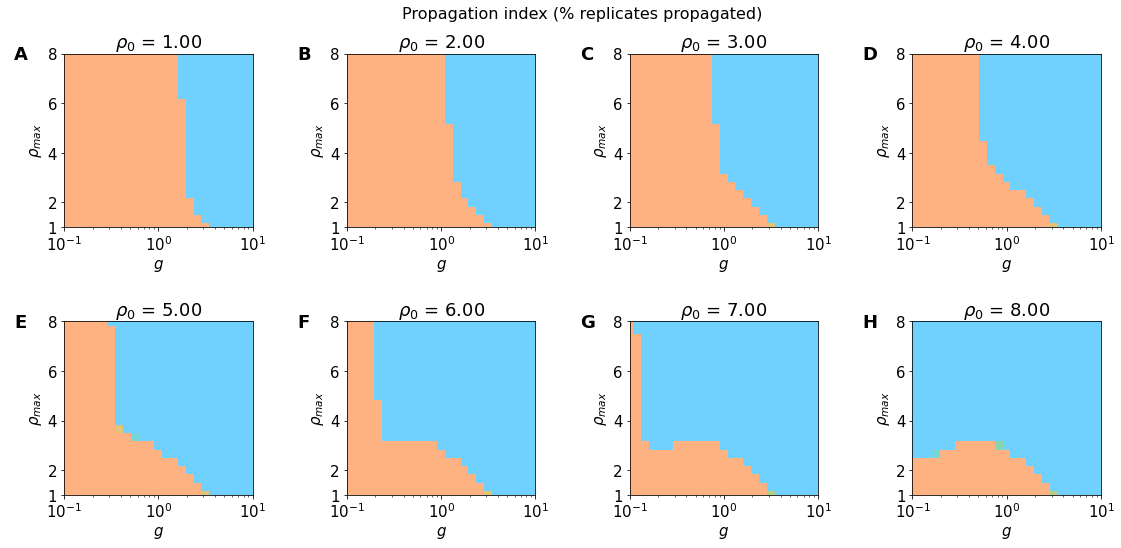

In [196]:
hv.Layout(prop_plots[2::6]).cols(4).opts(title=f"Propagation index (% replicates propagated)")

In [199]:
nplots = rho_0_space.size
phase_plots = []
for i in range(nplots):
    mask = param_space_agg[:, 1] == rho_0_space[i]
    plot = hv.Points(
        (param_space_agg[mask, 0], param_space_agg[mask, 2])
    ).opts(
        title = r"$\rho_0$ = " + f"{rho_0_space[i]:.2f}",
        xlim = (0.1, 10),
        ylim = (  1,  8),
        xlabel = r"$g$",
        ylabel = r"$\rho_{max}$",
        yticks = (1, 2, 4, 6, 8),
        marker = "s",
        s=70,
        c=np.array(cc.glasbey_cool)[phase_behavior[mask]], 
        cmap="plasma",
        logx=True, 
        aspect=2.5,
        fontscale=1.5,
    )
    
    phase_plots.append(plot)
    

:Layout
   .Points.I    :Points   [x,y]
   .Points.II   :Points   [x,y]
   .Points.III  :Points   [x,y]
   .Points.IV   :Points   [x,y]
   .Points.V    :Points   [x,y]
   .Points.VI   :Points   [x,y]
   .Points.VII  :Points   [x,y]
   .Points.VIII :Points   [x,y]
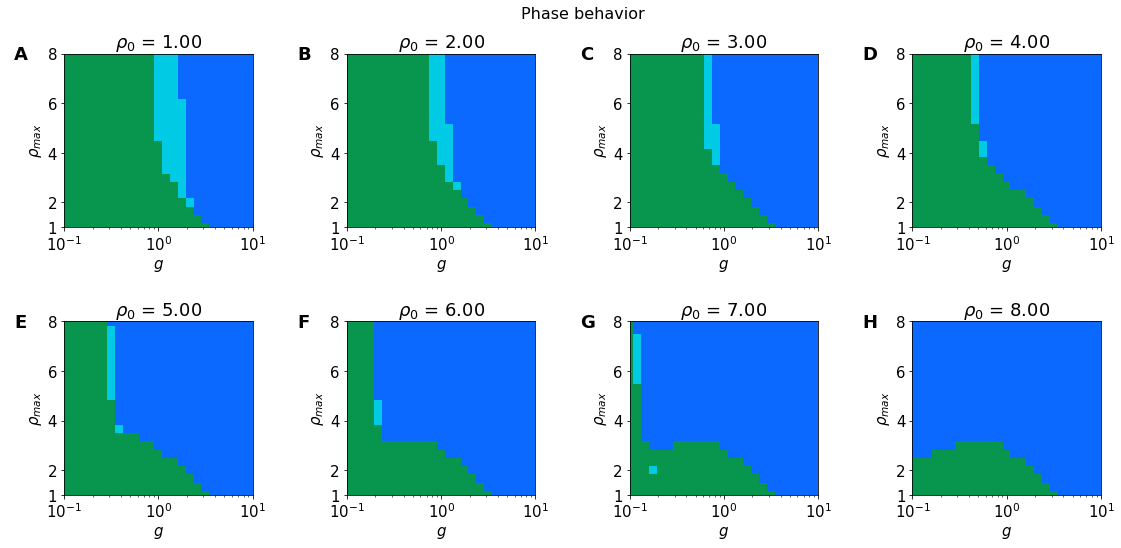

In [201]:
hv.Layout(phase_plots[2::3]).cols(4).opts(title=f"Phase behavior")

<hr>
    

## Plot phase diagram in 3D

start with points

when you can, replace points with phase boundaries

In [114]:
param_space_3d = param_space_agg.copy()
param_space_3d[:, 0] = np.log10(param_space_3d[:, 0])
# param_space_3d[:, 2] = param_space_3d[:, 2] - param_space_3d[:, 1]
which_growing = param_space_3d[:, 2] >= param_space_3d[:, 1]

In [115]:
param_space_3d.shape

(14400, 3)

In [116]:
phase_behavior.shape

(14400,)

:Scatter3D   [x,y,z]
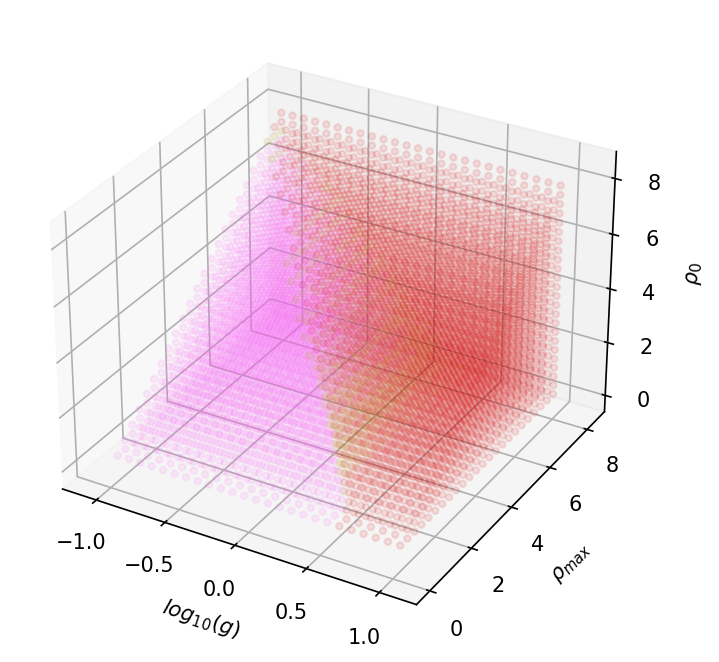

In [117]:
phase_3d = hv.Scatter3D(
    data=param_space_3d[which_growing][:, np.array([0, 2, 1])],
).opts(
    s=10,
    alpha=0.1,
    c=np.array(cc.glasbey_warm)[phase_behavior[which_growing]],
    xlabel=r"$log_{10}(g)$",
    zlabel=r"$\rho_0$",
    ylabel=r"$\rho_{max}$",
)

hv.output(phase_3d, dpi=150)

:Scatter3D   [x,y,z]
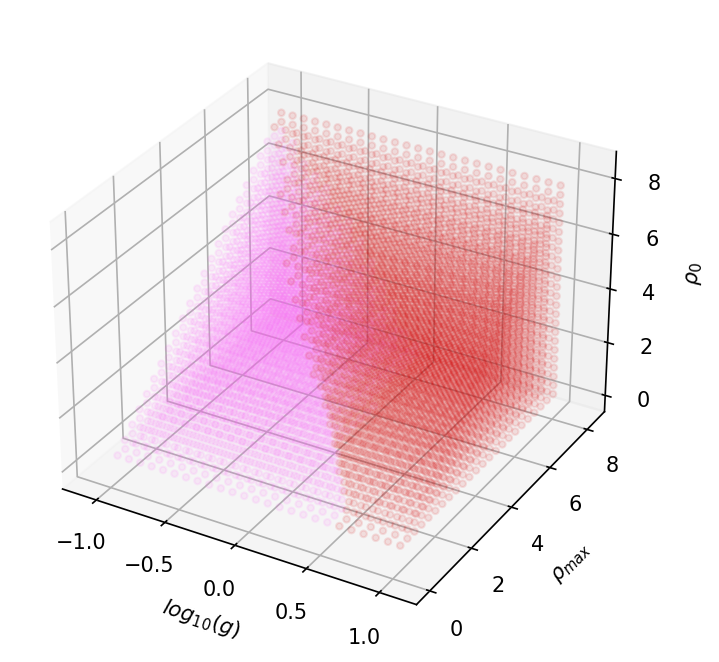

In [230]:
phase_3d = hv.Scatter3D(
    data=param_space_3d[which_growing][:, np.array([0, 2, 1])],
).opts(
    s=10,
    alpha=0.1,
    c=np.array(cc.glasbey_warm)[phase_behavior2[which_growing]],
    xlabel=r"$log_{10}(g)$",
    zlabel=r"$\rho_0$",
    ylabel=r"$\rho_{max}$",
)

hv.output(phase_3d, dpi=150)

<hr>

In [118]:
import matplotlib.pyplot as plt
%matplotlib inline

import colorcet as cc

In [119]:
@numba.njit
def rho_crit_approx(g, a=3.1, b=4.1):
    return a - b * np.log10(g)

In [120]:
@numba.njit
def t_crit_approx(g, rho_0, rho_max, *rho_crit_args):
    rho_crit = rho_crit_approx(g, *rho_crit_args)
    return -1/g * np.log((rho_max - rho_crit) / rho_crit * rho_0 / (rho_max - rho_0) )

In [121]:
@numba.njit
def t_crit_approx_levelset(t_crit, g, rho_max, *rho_crit_args):
    rho_crit = rho_crit_approx(g, *rho_crit_args)
    return rho_max * rho_crit / (rho_crit + (rho_max - rho_crit) * np.exp(g * t_crit))

## Plotting the level sets

In [240]:
phase_cols = np.array([*cc.glasbey_warm])[phase_behavior]

In [145]:
# t_crit = 5
# rho_max_ls = np.linspace(1, 8, 50)
# log10g_ls = np.linspace(-1, 0.75, 50)

# X, Y = np.meshgrid(log10g_ls, rho_max_ls)
# rho_crit_ls = rho_crit_approx(10**X)
# Z = t_crit_approx_levelset(t_crit, 10**X, Y)

# tol = 1e-5
# valid_samples = np.logical_and(Y - rho_crit_ls >= -tol, rho_crit_ls - Z >= -tol)

# xx, yy, zz = X[valid_samples], Y[valid_samples], Z[valid_samples]

In [241]:
t_crits = [1, 10]
n_samples = 50
tol = 1e-5

In [257]:
def plot_3d_phase_boundaries(t_crits, n_samples, tol=1e-5, dpi=150):

    rho_max_ls = np.linspace(1, 8, n_samples)
    log10g_ls = np.linspace(-1, 0.75, n_samples)

    X, Y = np.meshgrid(log10g_ls, rho_max_ls)
    rho_crit_ls = rho_crit_approx(10**X)

    rho_crit_ls = t_crit_approx_levelset(0, 10**X, Y)
    valid_samples = Y - rho_crit_ls >= -tol
    xx, yy = X[valid_samples].flatten(), Y[valid_samples].flatten()

    fig = plt.figure(figsize=(4,4))
    ax = plt.axes(projection='3d')

    # ax.contour3D(X, Y, Z, 50, cmap='binary')
    ax.set_xlabel(r"$g$")
    ax.set_xticks([-1, 0, 1])
    ax.set_xticklabels([r"$0.1$", r"$1$", r"$10$"])
    ax.set_ylabel(r"$\rho_{max}$")
    ax.set_yticks([0, 2, 4, 6, 8])
    ax.set_ylim3d([0, 8])
    ax.set_zlabel(r"$\rho_0$")
    ax.set_zticks([0, 2, 4, 6, 8])
    ax.set_zlim3d([0, 8])
    ax.scatter(
        *param_space_3d[which_growing].T[np.array([0, 2, 1])], 
        c=phase_cols[which_growing],
        s=170,
        marker="s",
        alpha = 0.005,
        linewidth=0,
    )
    ax.set_title(r"$t_{crit} =$ " + ", ".join([str(i) for i in t_crits]))

    for i, tc in enumerate(t_crits):

        zz = t_crit_approx_levelset(tc, 10**xx, yy)
        ax.plot_trisurf(xx.flatten(), yy.flatten(), zz.flatten(), facecolor=cc.glasbey_cool[i], alpha=0.5, edgecolor="none")

    # ax.scatter(xx, yy, zz, c=cc.bmy[0], s=1, alpha=0.5)

    plt.tight_layout()
    fig.set_facecolor("w")
    ax.set_facecolor("w") 
    plt.gcf().set(dpi=dpi)
    
    return fig, ax

C:\Users\Pranav\Anaconda3\lib\site-packages\ipykernel_launcher.py:43: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 


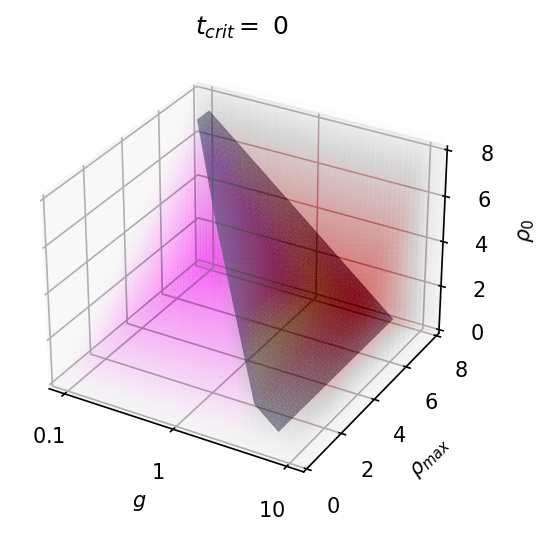

In [262]:
t_crits = [0]
n_samples = 50

fig, ax = plot_3d_phase_boundaries(t_crits, n_samples)

fig_fname = "20210414_3d_phase_boundaries_tc_{0}_ns_{1}".format("_".join([str(i) for i in t_crits]), n_samples)
fig_path = os.path.join("plots", fig_fname)

plt.savefig(fig_path, dpi=150)
plt.show()

C:\Users\Pranav\Anaconda3\lib\site-packages\ipykernel_launcher.py:43: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 


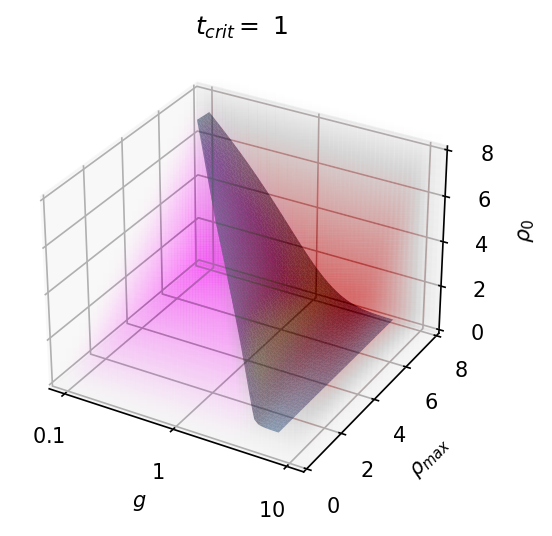

In [258]:
t_crits = [1]
n_samples = 50

fig, ax = plot_3d_phase_boundaries(t_crits, n_samples)

fig_fname = "20210414_3d_phase_boundaries_tc_{0}_ns_{1}".format("_".join([str(i) for i in t_crits]), n_samples)
fig_path = os.path.join("plots", fig_fname)

plt.savefig(fig_path, dpi=150)
plt.show()

C:\Users\Pranav\Anaconda3\lib\site-packages\ipykernel_launcher.py:43: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 


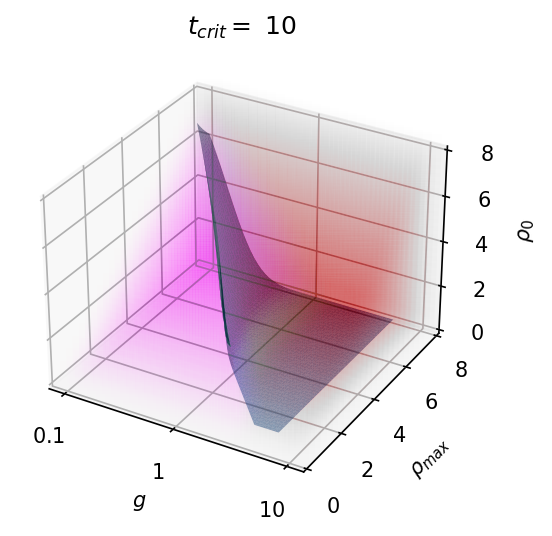

In [259]:
t_crits = [10]
n_samples = 50

fig, ax = plot_3d_phase_boundaries(t_crits, n_samples)

fig_fname = "20210414_3d_phase_boundaries_tc_{0}_ns_{1}".format("_".join([str(i) for i in t_crits]), n_samples)
fig_path = os.path.join("plots", fig_fname)

plt.savefig(fig_path, dpi=150)
plt.show()

C:\Users\Pranav\Anaconda3\lib\site-packages\ipykernel_launcher.py:43: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 


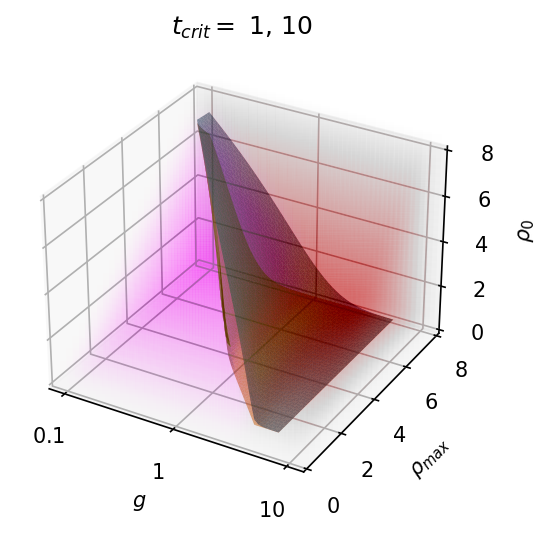

In [260]:
t_crits = [1, 10]
n_samples = 50

fig, ax = plot_3d_phase_boundaries(t_crits, n_samples)

fig_fname = "20210414_3d_phase_boundaries_tc_{0}_ns_{1}".format("_".join([str(i) for i in t_crits]), n_samples)
fig_path = os.path.join("plots", fig_fname)

plt.savefig(fig_path, dpi=150)
plt.show()

C:\Users\Pranav\Anaconda3\lib\site-packages\ipykernel_launcher.py:43: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 


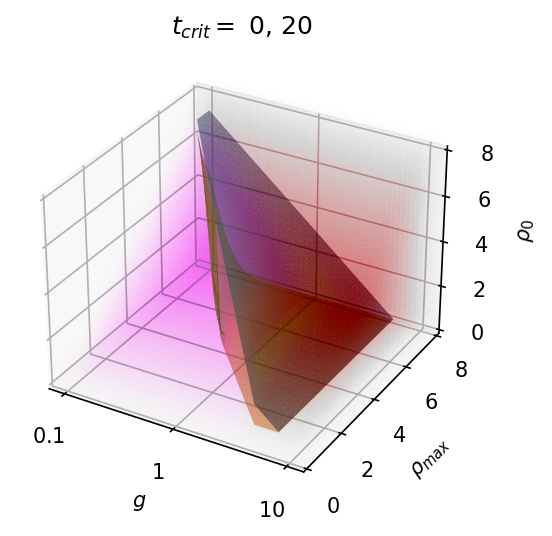

In [261]:
t_crits = [0, 20]
n_samples = 50

fig, ax = plot_3d_phase_boundaries(t_crits, n_samples)

fig_fname = "20210414_3d_phase_boundaries_tc_{0}_ns_{1}".format("_".join([str(i) for i in t_crits]), n_samples)
fig_path = os.path.join("plots", fig_fname)

plt.savefig(fig_path, dpi=150)
plt.show()

<hr>

## Derive expressions 


for (1) critical density and (2) critical time

(1)

We are looking for *equilibrium* behavior, so $s(t-\tau) = s(t)$ and $\partial_t s = 0$.

\begin{align}
0 = \partial_t s &= \lambda + \alpha \frac{s_t^p}{\left(g^2 k\right)^p + \left(\delta s\right)^p + s_t^p} - g s \\[1em]
s_t &= \beta(\rho) A s
\end{align}